### Emotion dataset

**Imports**

In [59]:
# Text preprocessing pipeline
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics


# imports 
import numpy as np
import pandas as pd
df = pd.read_excel('Diabetes-classification.xlsx', sheet_name ='Emotions')

In [60]:
# Preparing dataset
X = df.loc[:,'discussion_text']
y = df.loc[:,'Label']

# removes all duplicates from list 
Labels = list(dict.fromkeys(y)) 
print(Labels)

# Preprocess pipeline for texts
# and training configuration 
pipe_clf = Pipeline([
    ('vect', CountVectorizer(decode_error='ignore', stop_words='english')),
    ('tfidf', TfidfTransformer()),
    #('clf', LogisticRegression( penalty='l2', solver='lbfgs', dual=False, multi_class='multinomial', tol=1e-3)),
    ('clf', LogisticRegression( penalty='l2', solver='lbfgs', dual=False, class_weight='balanced', multi_class='multinomial', tol=1e-4)),
])

# Logistic regression parameters:
# - dual: Prefer dual=False when n_samples > n_features
# - tol: Tolerance for stopping criteria.
# - class_weight: dict or ‘balanced’, default=None


['Trust', 'Disgust', 'Anticipation', 'Sadness', 'Anger', 'Fear', 'Joy', 'Surprise']


**Logistic Regression classifier**
- You can use either use scikit-learn or NLTK for building the classifiers.
- test them using part of the labeled dataset as the test set

In [62]:
def get_most_informative_features(clf, vectorizer, 
                                  label_names, 
                                  max_number_informative_features):
    """
    Prints features with the highest coefficient values, per class
    """
    output = []

    
    try:
        feature_names = vectorizer.get_feature_names()

        label_index = len(label_names)
        
        if label_index == 2:
            label_index = 1
            print('features for binary classification!')
        
        for index in range(label_index):
#             print(str(index) + label_names[index])
            #print('clf.coef_:',len(clf.coef_))
            
            # will work nicely only with 2 categories (code {:>30} is just formatting)
#             output.append(f'\n {label_names[index]}: {label_names[index+1]:>30}:')
            output.append('\n' + label_names[index] + ':\n')
            
            #combine feature names with their coefficients
            coefs_with_fns = sorted(zip(clf.coef_[index], feature_names))
            
            #print(coefs_with_fns)
            
            #half for one label, half for the other
            threshold = int(max_number_informative_features / 2)

            top = zip(coefs_with_fns[:threshold],
                      coefs_with_fns[:-(threshold + 1):-1])
            
            for (coef_1, fn_1), (coef_2, fn_2) in top:
                feat = "\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2)
                output.append(feat)
            
            #print('\n'.join(output))
                
    except:
        print("Unexpected error:", sys.exc_info()[0])
        raise 
        return '\n'.join(output)

    return '\n'.join(output)

train


,0,1,2,3,4,5,6,7
0,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
1,69,739,238,96,227,288,127,924


test


,0,1,2,3,4,5,6,7
0,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
1,16,189,55,33,52,69,29,235


0.6174298375184638
accuracy (simple): 0.09734513274336283
[[ 1  3  1  1  2  1  3  4]
 [11 18 15 14 26 22 19 64]
 [ 4 11  5  2  7  6  4 16]
 [ 1  9  4  1  4  2  0 12]
 [ 0 20  3  3 10  3  1 12]
 [ 2 19  7  5  4  3  4 25]
 [ 1  5  2  2  3  5  2  9]
 [ 5 62 36 11 35 42 18 26]]


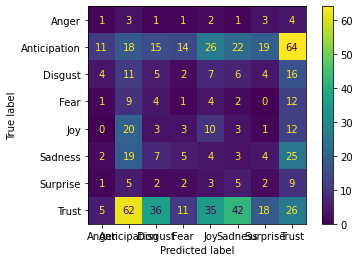

set()


In [63]:
# logistic regression Classifier

# Preparing the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=99) # , stratify=Labels 


# Display info about dataset distribution of classes 
from IPython.display import display
import pandas as pd

print("train")
arr = pd.DataFrame(np.unique(np.array(y_train), return_counts=True))
display(arr)

print("test")
arr2 = pd.DataFrame(np.unique(np.array(y_test), return_counts=True))
display(arr2)


# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(X_train, y_train)
# model.score(X_test,y_test)

# train and predict 
text_clf = pipe_clf.fit(X_train, y_train)
predictions = pipe_clf.predict(X_test)

score = pipe_clf.score(X_train,y_train)
print(score)
#predictions = pipe_clf.predict(y_train)

# print(y_test)
# print(X_test)

# print("X: " + str(len(X_test)))
# print("y: " + str(len(y_test)))

# print result 
print('accuracy (simple):', accuracy_score(y_test, predictions))
# measures_info = metrics.classification_report(y_test, predictions, target_names=Labels) #, labels=np.unique(predictions)
# print(measures_info)

# Confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
print(cnf_matrix)
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_clf, X_test, y_test)  
plt.show()

# print(pipe_clf.named_steps['vect'].vocabulary_) # prints vocabulary created by CountVectorizer
print(pipe_clf.named_steps['vect'].stop_words_)


In [65]:
vectorizer = pipe_clf.named_steps['vect']

clf = pipe_clf.named_steps['clf']


#feature_names = vectorizer.get_feature_names()


imp_features = get_most_informative_features(clf, vectorizer, Labels, 30)


#print('len of coeffients: ', len(clf.coef_[0]), '\n', clf.coef_)

#print('len of intercepts: ', len(clf.intercept_), '\n', clf.intercept_)

print('imp_features\n', imp_features)

imp_features
 
Trust:

	-0.9361	sugars         		1.9025	congrats       
	-0.9067	start          		1.8137	micronase      
	-0.8400	doctor         		1.6956	bmi            
	-0.8385	want           		1.6406	tests          
	-0.8307	a1c            		1.5834	shakes         
	-0.8238	lot            		1.5596	glycemic       
	-0.8013	life           		1.5459	did            
	-0.7950	hello          		1.5160	happens        
	-0.7812	think          		1.4990	parent         
	-0.7803	like           		1.4400	diagonized     
	-0.7450	eating         		1.4307	linked         
	-0.7404	years          		1.3309	50             
	-0.7361	condition      		1.3103	diseases       
	-0.7079	insulin        		1.3079	ketoacidosis   
	-0.7044	months         		1.3034	tell           

Disgust:

	-1.0525	years          		0.6256	hours          
	-0.8243	hi             		0.5995	hello          
	-0.7701	carbs          		0.5696	manage         
	-0.7283	different      		0.5437	issue          
	-0.6347	obesity        		0.5383	do

**TODO**
- Bag-of-words
- Bag-of-n-grams 
- Tf-Idf (is probably shit for our use case)

https://medium.com/analytics-vidhya/applying-text-classification-using-logistic-regression-a-comparison-between-bow-and-tf-idf-1f1ed1b83640